<a href="https://colab.research.google.com/github/mhyls26/CCMACLRL_EXERCISES_COM231ML/blob/main/ASSIGNMENT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

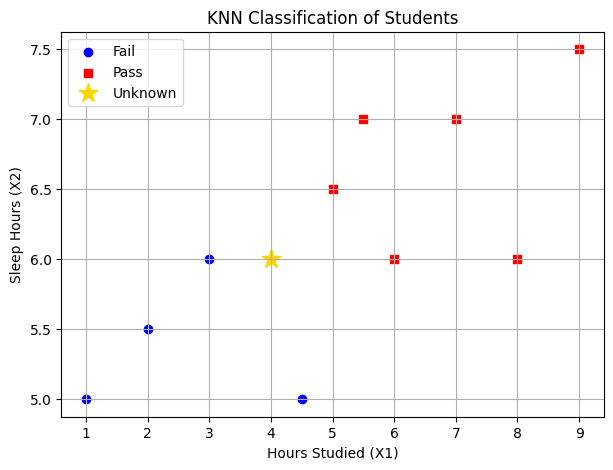


=== Distances Table ===
   Student  X1_Hours_Studied  X2_Sleep_Hours  Y_PassFail  Distance
0        1               1.0             5.0           0  3.162278
1        2               2.0             5.5           0  2.061553
2        3               3.0             6.0           0  1.000000
3        4               4.5             5.0           0  1.118034
4        5               5.0             6.5           1  1.118034
5        6               5.5             7.0           1  1.802776
6        7               6.0             6.0           1  2.000000
7        8               7.0             7.0           1  3.162278
8        9               8.0             6.0           1  4.000000
9       10               9.0             7.5           1  5.220153

=== 3 Nearest Neighbors ===
   Student  X1_Hours_Studied  X2_Sleep_Hours  Y_PassFail  Distance
2        3               3.0             6.0           0  1.000000
3        4               4.5             5.0           0  1.118034
4       

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==========================
# Assignment 1 - KNN Example
# ==========================

# Training Data
data = {
    'Student': [1,2,3,4,5,6,7,8,9,10],
    'X1_Hours_Studied': [1.0,2.0,3.0,4.5,5.0,5.5,6.0,7.0,8.0,9.0],
    'X2_Sleep_Hours': [5.0,5.5,6.0,5.0,6.5,7.0,6.0,7.0,6.0,7.5],
    'Y_PassFail': [0,0,0,0,1,1,1,1,1,1]
}

df = pd.DataFrame(data)

# New Student
new_point = (4.0, 6.0)

# ================
# 1. Scatter Plot
# ================
plt.figure(figsize=(7,5))
for i,row in df.iterrows():
    if row['Y_PassFail'] == 0:
        plt.scatter(row['X1_Hours_Studied'], row['X2_Sleep_Hours'], c='blue', marker='o', label='Fail' if i==0 else "")
    else:
        plt.scatter(row['X1_Hours_Studied'], row['X2_Sleep_Hours'], c='red', marker='s', label='Pass' if i==4 else "")

# Unknown point ⭐
plt.scatter(new_point[0], new_point[1], c='gold', marker='*', s=200, label='Unknown')

plt.xlabel('Hours Studied (X1)')
plt.ylabel('Sleep Hours (X2)')
plt.title('KNN Classification of Students')
plt.legend()
plt.grid(True)
plt.show()

# ==========================
# 2. Compute Distances Table
# ==========================
def euclidean(x1, x2, y1, y2):
    return np.sqrt((x1 - y1)**2 + (x2 - y2)**2)

# Calculate distances
results = []
for i,row in df.iterrows():
    dist = euclidean(row['X1_Hours_Studied'], row['X2_Sleep_Hours'], new_point[0], new_point[1])
    results.append(dist)

df['Distance'] = results
print("\n=== Distances Table ===")
print(df[['Student','X1_Hours_Studied','X2_Sleep_Hours','Y_PassFail','Distance']])

# =============================
# 3. Find 3 Nearest Neighbors
# =============================
k = 3
neighbors = df.sort_values('Distance').head(k)
print("\n=== 3 Nearest Neighbors ===")
print(neighbors[['Student','X1_Hours_Studied','X2_Sleep_Hours','Y_PassFail','Distance']])

# ======================
# 4. Majority Vote
# ======================
prediction = neighbors['Y_PassFail'].mode()[0]

print("\n=== Majority Vote ===")
print("Pass count:", (neighbors['Y_PassFail']==1).sum())
print("Fail count:", (neighbors['Y_PassFail']==0).sum())
print("Prediction for new student (X1=4, X2=6):", "Pass" if prediction==1 else "Fail")

# ======================
# 5. Discussion Questions
# ======================
print("\n=== Discussion ===")
print("1. Final prediction with k=3:", "Pass" if prediction==1 else "Fail")

# Check with k=5
neighbors_k5 = df.sort_values('Distance').head(5)
prediction_k5 = neighbors_k5['Y_PassFail'].mode()[0]
print("2. With k=5, prediction:", "Pass" if prediction_k5==1 else "Fail")
